In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
pd.set_option('display.max_column', None)
df = pd.read_csv('../data/clean_data/data_v1.csv', index_col=0)
df.head()

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,full_time_work,full_part_school,highest_education,hs_col_unenrolled,weekly_earnings,hourly_work_yn,hours_worked,labor_force_recode,marital_status,main_job_industry_recode,sex,union_contract_avail,union_member_yn,reason_unemployed,weeks_unemployed,ft_pt_unem,age_recode_gt15,federal_gross_income_adj,need_childcare,hh_childcare_val,hh_childcare,health_insurance_ly,company_offer_insurance,poverty_ratio,family_earn_ly,fam_id,fam_med_costs,fam_outofpocket_med_costs,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,Some College But No Degree,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Never married,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,0,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Divorced,"Not in universe, or children",Male,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,70 to 74 years,9,Niu,-1,Niu,Coverage for all of year,NIU,BELOW POVERTY LEVEL,0,1,0,60,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,0,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Widowed,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,65 to 69 years,2400,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,0,1,0,0,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,0,0,High school graduate-high school diploma,0,0,Not in universe or children & Armed Forc,0,Not in labor force,Marr-civ sp present,"Not in universe, or children",Female,Not in universe or children & Armed Forc,Not in universe or children & Armed Forc,Not in univ or children or Armed Forces,0,Not in labor force,50 to 54 years,47828,Niu,-1,Niu,Coverage for all of year,NIU,150 AND ABOVE THE POVERTY LEVEL,42000,1,50,1370,0,0,ME,3,23


In [3]:
education_map = {"Children":"Less than highschool",
                "11th Grade" : "Less than highschool",
                "10th Grade": "Less than highschool",
                "9th Grade" : "Less than highschool",
                "7th and 8th grade" : "Less than highschool",
                "12th Grade No Diploma" : "Less than highschool",
                "5th Or 6th Grade" : "Less than highschool",
                "1st,2nd,3rd,or 4th grade": "Less than highschool",
                "Less Than 1st Grade": "Less than highschool",
                "Bachelor's degree (BA,AB,BS)" : "Undergrad",
                "Master's degree (MA,MS,MENG,MED,MSW,MBA)": "Masters or Higher",
                "Doctorate degree (PHD,EDD)" : "Masters or Higher",
                "Professional school degree (MD,DDS,DVM,L" : "Masters or Higher",
                "Some College But No Degree" : "Some College",
                "Assc degree-academic program" : "Some College",
                "Assc degree-occupation/vocation" : "Some College",
                "High school graduate-high school diploma" : "highschool"
}
sex_map = {
            "Male":0,
            "Female":1
}
poverty_ratio_map = {
    'BELOW POVERTY LEVEL' : "Impoverished" ,
    '150 AND ABOVE THE POVERTY LEVEL' : "Not Impoverished",
    '100 - 124 PERCENT OF THE POVERTY LEVEL' : "Impoverished",
    '125 - 149 PERCENT OF THE POVERTY LEVEL' : "Impoverished",
    'NOT IN POVERTY UNIVERSE' : "NIU"
}


In [4]:
df = df.query("employment < 2")
df = df.loc[df['federal_gross_income_adj']>=0]
df = df[df['poverty_ratio'] != 'NOT IN POVERTY UNIVERSE']

In [5]:
df.highest_education = df.highest_education.map(education_map)
df.sex = df.sex.map(sex_map)
df.poverty_ratio = df.poverty_ratio.map(poverty_ratio_map)

In [6]:
numeric_columns = ['federal_gross_income_adj', 
                   'fam_size', 
                   'age', 
                   'fam_med_costs', 
                   'weeks_unemployed', 
                   'hours_worked', 
                   'poverty_ratio', 
                   'highest_education', 
                   'sex', 
                   'employment'
] 
svm_data = df.loc[:,numeric_columns]

In [7]:
encoder = LabelEncoder()
svm_data['highest_education'] = encoder.fit_transform(svm_data['highest_education'])
svm_data['poverty_ratio'] = encoder.fit_transform(svm_data['poverty_ratio'])

In [8]:
svm_data.head()

,federal_gross_income_adj,fam_size,age,fam_med_costs,weeks_unemployed,hours_worked,poverty_ratio,highest_education,sex,employment
1,0,0,67,0,0,0,0,2,1,0
2,9,0,74,0,0,0,0,4,0,0
3,0,1,66,0,0,0,1,4,1,0
4,2400,1,68,0,0,0,1,4,1,0
5,47828,1,52,50,0,0,1,4,1,0


In [9]:
from imblearn.under_sampling import RandomUnderSampler

In [10]:
X = svm_data.drop(columns = 'poverty_ratio')
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, svm_data['poverty_ratio'], train_size=0.7, test_size=0.3)
rus = RandomUnderSampler(random_state=1111, sampling_strategy={0:3000,1:3000})
X_train, y_train = rus.fit_resample(X_train, y_train)

In [11]:
LinearSVM_a = SVC(kernel = 'linear',
                  C = 1.0,
)
LinearSVM_b = SVC(kernel = 'linear',
                  C = 0.2,
)
LinearSVM_c = SVC(kernel = 'linear',
                  C = 0.7,
)

In [12]:
LinearSVM_a.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
LinearSVM_b.fit(X_train, y_train)

SVC(C=0.2, kernel='linear')

In [14]:
LinearSVM_c.fit(X_train, y_train)

SVC(C=0.7, kernel='linear')

In [15]:
rbfSVM_a = SVC(kernel = 'rbf',
                  C = 1.0,
)
rbfSVM_b = SVC(kernel = 'rbf',
                  C = 0.2,
)
rbfSVM_c = SVC(kernel = 'rbf',
                  C = 0.7,
)

In [16]:
rbfSVM_a.fit(X_train, y_train)

SVC()

In [17]:
rbfSVM_b.fit(X_train, y_train)

SVC(C=0.2)

In [18]:
rbfSVM_c.fit(X_train, y_train)

SVC(C=0.7)

In [19]:
sigmoidSVM_a = SVC(kernel = 'sigmoid',
                  C = 1.0,
)
sigmoidSVM_b = SVC(kernel = 'sigmoid',
                  C = 0.2,
)
sigmoidSVM_c = SVC(kernel = 'sigmoid',
                  C = 0.7,
)

In [20]:
sigmoidSVM_a.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [21]:
sigmoidSVM_b.fit(X_train, y_train)

SVC(C=0.2, kernel='sigmoid')

In [22]:
sigmoidSVM_c.fit(X_train, y_train)

SVC(C=0.7, kernel='sigmoid')

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
row_id = ['linearSVM_a', 'LinearSVM_b', 'LinearSVM_c', 'rbfSVM_a', 'rbfSVM_b', 'rbfSVM_c', 'sigmoidSVM_a', 'sigmoidSVM_b', 'sigmoidSVM_c']
accuracy_scores = [accuracy_score(y_true = y_test, y_pred = LinearSVM_a.predict(X_test)), 
                   accuracy_score(y_true = y_test, y_pred = LinearSVM_b.predict(X_test)),
                   accuracy_score(y_true = y_test, y_pred = LinearSVM_c.predict(X_test)),
                   accuracy_score(y_true = y_test, y_pred = rbfSVM_a.predict(X_test)),
                   accuracy_score(y_true = y_test, y_pred = rbfSVM_b.predict(X_test)),
                   accuracy_score(y_true = y_test, y_pred = rbfSVM_c.predict(X_test)),
                   accuracy_score(y_true = y_test, y_pred = sigmoidSVM_a.predict(X_test)),
                   accuracy_score(y_true = y_test, y_pred = sigmoidSVM_b.predict(X_test)),
                   accuracy_score(y_true = y_test, y_pred = sigmoidSVM_c.predict(X_test))
]

In [25]:
from sklearn.metrics import f1_score

fscores = [f1_score(y_true = y_test, y_pred = LinearSVM_a.predict(X_test)), 
                   f1_score(y_true = y_test, y_pred = LinearSVM_b.predict(X_test)),
                   f1_score(y_true = y_test, y_pred = LinearSVM_c.predict(X_test)),
                   f1_score(y_true = y_test, y_pred = rbfSVM_a.predict(X_test)),
                   f1_score(y_true = y_test, y_pred = rbfSVM_b.predict(X_test)),
                   f1_score(y_true = y_test, y_pred = rbfSVM_c.predict(X_test)),
                   f1_score(y_true = y_test, y_pred = sigmoidSVM_a.predict(X_test)),
                   f1_score(y_true = y_test, y_pred = sigmoidSVM_b.predict(X_test)),
                   f1_score(y_true = y_test, y_pred = sigmoidSVM_c.predict(X_test))
]

In [26]:
from sklearn.metrics import precision_score

precision_scores = [precision_score(y_true = y_test, y_pred = LinearSVM_a.predict(X_test)), 
                   precision_score(y_true = y_test, y_pred = LinearSVM_b.predict(X_test)),
                   precision_score(y_true = y_test, y_pred = LinearSVM_c.predict(X_test)),
                   precision_score(y_true = y_test, y_pred = rbfSVM_a.predict(X_test)),
                   precision_score(y_true = y_test, y_pred = rbfSVM_b.predict(X_test)),
                   precision_score(y_true = y_test, y_pred = rbfSVM_c.predict(X_test)),
                   precision_score(y_true = y_test, y_pred = sigmoidSVM_a.predict(X_test)),
                   precision_score(y_true = y_test, y_pred = sigmoidSVM_b.predict(X_test)),
                   precision_score(y_true = y_test, y_pred = sigmoidSVM_c.predict(X_test))
]

In [27]:
from sklearn.metrics import recall_score

recall_scores = [recall_score(y_true = y_test, y_pred = LinearSVM_a.predict(X_test)), 
                   recall_score(y_true = y_test, y_pred = LinearSVM_b.predict(X_test)),
                   recall_score(y_true = y_test, y_pred = LinearSVM_c.predict(X_test)),
                   recall_score(y_true = y_test, y_pred = rbfSVM_a.predict(X_test)),
                   recall_score(y_true = y_test, y_pred = rbfSVM_b.predict(X_test)),
                   recall_score(y_true = y_test, y_pred = rbfSVM_c.predict(X_test)),
                   recall_score(y_true = y_test, y_pred = sigmoidSVM_a.predict(X_test)),
                   recall_score(y_true = y_test, y_pred = sigmoidSVM_b.predict(X_test)),
                   recall_score(y_true = y_test, y_pred = sigmoidSVM_c.predict(X_test))
]

In [28]:
results = pd.DataFrame(columns=['Model', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score'],
                       data = list(zip(row_id, accuracy_scores, precision_scores, recall_scores, fscores))                      
)

In [29]:
results

,Model,accuracy_score,precision_score,recall_score,f1_score
0,linearSVM_a,0.654287,0.944576,0.607462,0.739408
1,LinearSVM_b,0.654031,0.944032,0.607520,0.739283
2,LinearSVM_c,0.653892,0.944653,0.606887,0.739005
3,rbfSVM_a,0.721808,0.948893,0.692759,0.800845
4,rbfSVM_b,0.700880,0.945265,0.668220,0.782957
5,rbfSVM_c,0.716652,0.948370,0.686430,0.796415
6,sigmoidSVM_a,0.591271,0.861713,0.588159,0.699130
7,sigmoidSVM_b,0.602118,0.871664,0.594776,0.707079
8,sigmoidSVM_c,0.591968,0.862651,0.588303,0.699540


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_true= y_test, y_pred = rbfSVM_a.predict(X_test)))

              precision    recall  f1-score   support

           0       0.40      0.84      0.54      8292
           1       0.95      0.69      0.80     34761

    accuracy                           0.72     43053
   macro avg       0.67      0.77      0.67     43053
weighted avg       0.84      0.72      0.75     43053



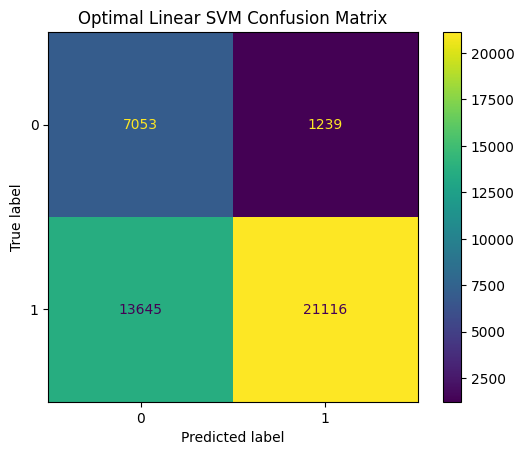

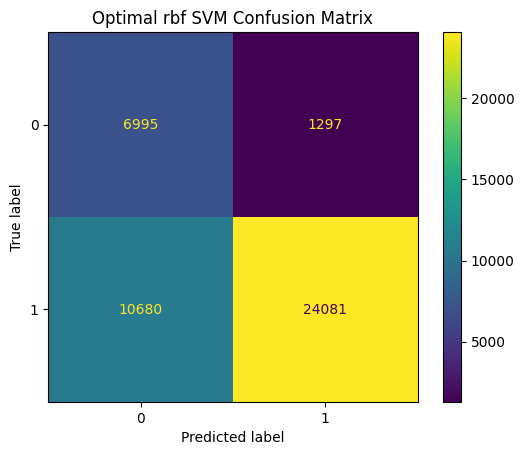

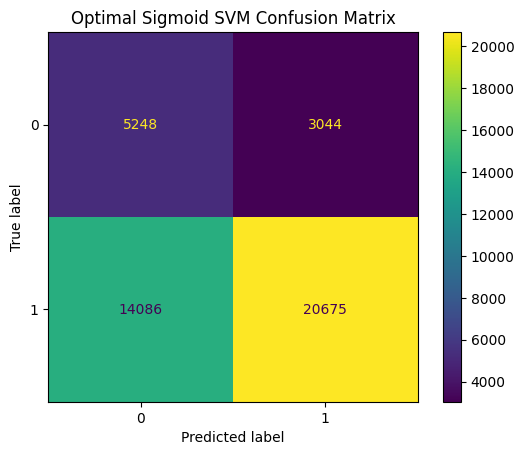

In [34]:
linearSVM_confusion = ConfusionMatrixDisplay.from_estimator(LinearSVM_a, X_test, y_test)
plt.title("Optimal Linear SVM Confusion Matrix")
plt.savefig("../site_pages/plots/linearSVMConfusion.png")
rbfSVM_confusion = ConfusionMatrixDisplay.from_estimator(rbfSVM_a, X_test, y_test)
plt.title("Optimal rbf SVM Confusion Matrix")
plt.savefig("../site_pages/plots/rbfSVMConfusion.png")
sigmoidSVM_confsuion = ConfusionMatrixDisplay.from_estimator(sigmoidSVM_b, X_test, y_test)
plt.title("Optimal Sigmoid SVM Confusion Matrix")
plt.savefig("../site_pages/plots/sigmoidSVMConfusion.png")

In [38]:
X_columns = svm_data.drop(columns = 'poverty_ratio')
X_columns = X_columns.columns
X_train_df = pd.DataFrame(data = X_train, columns = X_columns)
X_train_df.head()

,federal_gross_income_adj,fam_size,age,fam_med_costs,weeks_unemployed,hours_worked,highest_education,sex,employment
0,-0.432729,-1.968061,1.163031,-0.480885,-0.020846,-0.842463,0.096883,0.973591,-0.957664
1,-0.265626,0.288997,1.333949,-0.480885,-0.020846,-0.842463,1.387408,-1.027126,-0.957664
2,-0.432729,0.288997,-0.247044,0.319375,-0.020846,1.067770,1.387408,-1.027126,1.044207
3,-0.432729,0.288997,-0.460691,-0.355844,-0.020846,-0.842463,1.387408,0.973591,-0.957664
4,-0.432729,-1.968061,0.693006,-0.480885,-0.020846,-0.842463,-1.193642,0.973591,-0.957664


In [39]:
pd.set_option("display.max_column", 10)
df.head()

,age,job_industry_recode,school_enroll_lastweek,employment,fam_size,...,fam_otc_med_costs,fam_rent_val,fips,state,state.1
1,67,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,...,0,0,ME,4,23
2,74,"Not in universe, or children",Not in univ. or children & Armed Forces,0,0,...,60,0,ME,4,23
3,66,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,...,0,0,ME,3,23
4,68,"Not in universe, or children",Not in univ. or children & Armed Forces,0,1,...,0,0,ME,3,23
5,52,"Not in universe, or children",No,0,1,...,0,0,ME,3,23
